<a href="https://colab.research.google.com/github/socheata537/colab-homework/blob/main/DBSCAN_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Cluster Labels: [1, 1, 1, 2, 2, 2, -1]


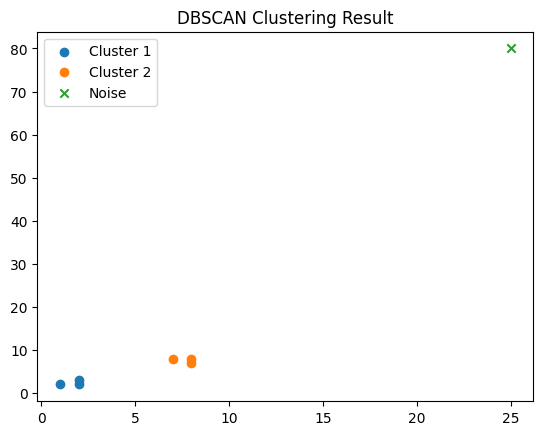

In [ ]:
X = np.array([
    [1, 2], [2, 2], [2, 3],
    [8, 7], [8, 8], [7, 8],
    [25, 80]  # noise point
])

eps = 2
minPts = 2

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

# -------------------------
# DBSCAN Algorithm
# -------------------------
def dbscan(X, eps, minPts):
    n = len(X)
    labels = [0] * n          # 0 = unvisited
    cluster_id = 0

    for i in range(n):
        if labels[i] != 0:
            continue

        neighbors = region_query(X, i, eps)

        # If not core point → noise
        if len(neighbors) < minPts:
            labels[i] = -1
        else:
            cluster_id += 1
            labels[i] = cluster_id

            # Expand cluster
            k = 0
            while k < len(neighbors):
                j = neighbors[k]

                if labels[j] == -1:
                    labels[j] = cluster_id

                if labels[j] == 0:
                    labels[j] = cluster_id
                    j_neighbors = region_query(X, j, eps)
                    if len(j_neighbors) >= minPts:
                        neighbors.extend(j_neighbors)

                k += 1

    return labels

# -------------------------
# Run DBSCAN
# -------------------------
labels = dbscan(X, eps, minPts)

print("Cluster Labels:", labels)

# -------------------------
# Visualization
# -------------------------
plt.figure()
unique_labels = set(labels)

for lbl in unique_labels:
    if lbl == -1:
        color = 'black'
        marker = 'x'
        label = 'Noise'
    else:
        color = None
        marker = 'o'
        label = f'Cluster {lbl}'

    points = X[np.array(labels) == lbl]
    plt.scatter(points[:, 0], points[:, 1], label=label, marker=marker)

plt.legend()
plt.title("DBSCAN Clustering Result")
plt.show()